In [232]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib as plt
#import nesseceary libraries from sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

In [2]:
#get data from csv
test_df = pd.read_csv('test.csv')
train_df = pd.read_csv('train.csv')

In [3]:
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [3]:
#Get the data from the model with sex in percent surviced more
train_df.groupby('Sex')[['Survived']].mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [7]:
#take some params from set as we think they are important to us

y = train_df["Survived"]
features = ["Pclass","SibSp","Sex","Parch"]
X = pd.get_dummies(train_df[features])
X_test = pd.get_dummies(test_df[features])


In [14]:
forest_random_model = RandomForestClassifier(n_estimators=10, max_depth=7, random_state=3)
# Forest of randomly created decision trees
# n_estimators - count of trees in forest
# max_depth - the depth of the trees that mean the number of edges from the node to the 
#tree's root node. A root node will have a depth of 0.
# random_state - Controls the randomness of the estimator.
forest_random_model.fit(X, y)
print("F1 forest score accuracy is {} ".format(f1_score(y,forest_random_model.predict(X))))
cm_forest = confusion_matrix(y, forest_random_model.predict(X)) 
print("\nForest matrix is \n {}".format(cm_forest))
TN, FP, FN, TP = confusion_matrix(y, forest_random_model.predict(X)).ravel()
print('Testing Accuracy = "{} !" and with score is {}'.format((TP + TN) / (TP + TN + FN + FP)
                                                             ,forest_random_model.score(X,y) ) )

F1 forest score accuracy is 0.7503828483920368 

Forest matrix is 
 [[483  66]
 [ 97 245]]
Testing Accuracy = "0.8170594837261503 !" and with score is 0.8170594837261503


F1 dec_tree score accuracy is 0.7266666666666667 
F1 dec_tree_2 score accuracy is 0.7103658536585367 
F1 dec_tree_3 score accuracy is 0.62890625 

Dec_Tree matrix is 
 [[509  40]
 [124 218]]
Testing Accuracy = "0.8159371492704826 !" and with score is 0.8159371492704826

Dec_Tree_2 matrix is 
 [[468  81]
 [109 233]]
Testing Accuracy = "0.7867564534231201 !" and with score is 0.7867564534231201

Dec_Tree_3 matrix is 
 [[540   9]
 [181 161]]
Testing Accuracy = "0.7867564534231201 !" and with score is 0.7867564534231201


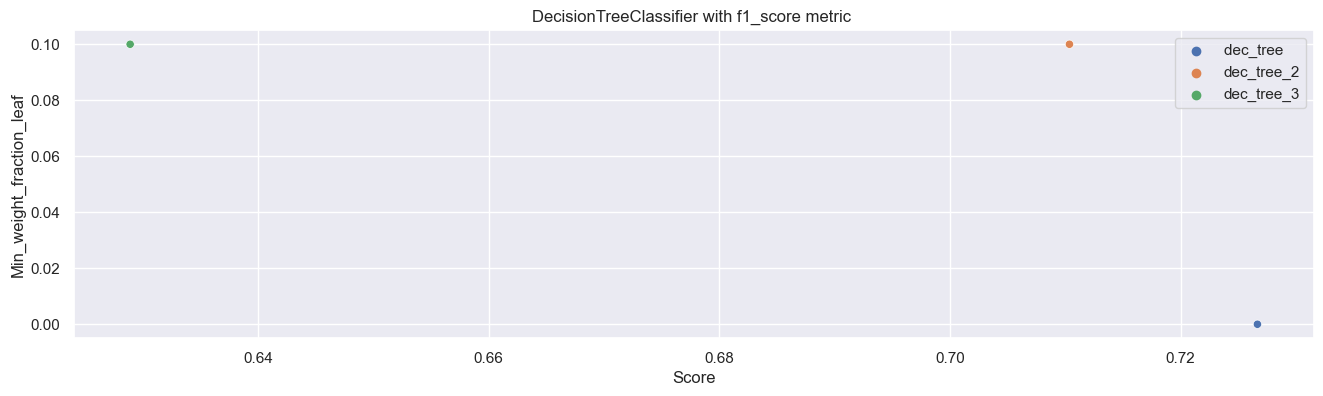

In [273]:
#first will be Decision Tree classificator
dec_tree = DecisionTreeClassifier(criterion = 'gini', 
                                  random_state = 0,
                                  max_depth = 7)

dec_tree_2 = DecisionTreeClassifier(criterion = 'gini',
                                    splitter = 'best',
                                    min_samples_split = 2,
                                    random_state = 0,
                                    max_depth = 9,
                                    min_samples_leaf = 1,
                                    min_weight_fraction_leaf = 0.1,
                                    max_features = 'log2',
                                    max_leaf_nodes = 8,
                                    min_impurity_decrease = 0.01,
                                    class_weight = 'balanced',
                                    ccp_alpha = 0.1)

dec_tree_3 = DecisionTreeClassifier(criterion = 'entropy',
                                    splitter = 'best',
                                    min_samples_split = 2,
                                    random_state = 0,
                                    max_depth = 7,
                                    min_samples_leaf = 0.1,
                                    min_weight_fraction_leaf = 0.1,
                                    max_leaf_nodes = 8,
                                    min_impurity_decrease = 0.0,
                                    ccp_alpha = 0.0)

dec_tree_4 = DecisionTreeClassifier(criterion = 'entropy',
                                    splitter = 'random', 
                                    min_samples_split = 100,
                                    random_state = 100,
                                    max_depth = 1000,
                                    min_samples_leaf = 100,
                                    min_weight_fraction_leaf = 0.1,
                                    max_features = 'log2', 
                                    max_leaf_nodes = 800,
                                    min_impurity_decrease = 500,
                                    class_weight = 'balanced',
                                    ccp_alpha = 0.1)

dec_tree_5 = DecisionTreeClassifier(criterion = 'entropy',
                                    splitter = 'random', 
                                    min_samples_split = 100,
                                    random_state = 100,
                                    max_depth = 1000,
                                    min_samples_leaf = 100,
                                    min_weight_fraction_leaf = 0.1,
                                    max_features = 'log2', 
                                    max_leaf_nodes = 800,
                                    min_impurity_decrease = 500,
                                    class_weight = 'balanced',
                                    ccp_alpha = 6)


# DecisionTree is CART algorithm: Classification and Regression Tree.
# there are 3 criterion:
# entropy , gini , log_loss.The function to measure the quality of a split. 
# As we can see there is no difference in results between gini and entropy
# random state - Controls the randomness of the estimator

# fit an estimator to be able to predict the classes to which unseen samples belong.
dec_tree.fit(X, y)
dec_tree_2.fit(X,y)
dec_tree_3.fit(X,y)
dec_tree_4.fit(X,y)
dec_tree_5.fit(X,y)

cm_dec_tree = confusion_matrix(y, dec_tree.predict(X))  
cm_dec_tree_2 = confusion_matrix(y, dec_tree_2.predict(X)) 
cm_dec_tree_3 = confusion_matrix(y, dec_tree_3.predict(X)) 


print("F1 dec_tree score accuracy is {} ".format(f1_score(y,dec_tree.predict(X))))
print("F1 dec_tree_2 score accuracy is {} ".format(f1_score(y,dec_tree_2.predict(X))))
print("F1 dec_tree_3 score accuracy is {} ".format(f1_score(y,dec_tree_3.predict(X))))

print("\nDec_Tree matrix is \n {}".format(cm_dec_tree))
TN, FP, FN, TP = confusion_matrix(y, dec_tree.predict(X)).ravel()
print('Testing Accuracy = "{} !" and with score is {}'.format((TP + TN) / (TP + TN + FN + FP)
                                                             ,dec_tree.score(X,y) ) )

print("\nDec_Tree_2 matrix is \n {}".format(cm_dec_tree_2))
TN, FP, FN, TP = confusion_matrix(y, dec_tree_2.predict(X)).ravel()
print('Testing Accuracy = "{} !" and with score is {}'.format((TP + TN) / (TP + TN + FN + FP)
                                                             ,dec_tree_2.score(X,y) ) )

print("\nDec_Tree_3 matrix is \n {}".format(cm_dec_tree_3))
TN, FP, FN, TP = confusion_matrix(y, dec_tree_3.predict(X)).ravel()
print('Testing Accuracy = "{} !" and with score is {}'.format((TP + TN) / (TP + TN + FN + FP)
                                                             ,dec_tree_3.score(X,y) ) )


data = [[f1_score(y,dec_tree.predict(X)),dec_tree.min_weight_fraction_leaf],
       [f1_score(y,dec_tree_2.predict(X)),dec_tree_2.min_weight_fraction_leaf],
       [f1_score(y,dec_tree_3.predict(X)),dec_tree_3.min_weight_fraction_leaf]]

df = pd.DataFrame(data,index = 
                  ['dec_tree ','dec_tree_2','dec_tree_3'],columns = ['Score','Min_weight_fraction_leaf',])


# sns.set(rc={"figure.figsize":(16, 4)})
gf = sns.scatterplot(data=df, x='Score', y='Min_weight_fraction_leaf',hue=df.index ).set(title='DecisionTreeClassifier with f1_score metric ')

# ds = sns.lmplot(data=df, x="Score", y="Min_weight_fraction_leaf", height=5, aspect=1.5, hue = df.index)



In [16]:
log = LogisticRegression(random_state = 0)
#linear model for classification rather than regression.statistical method for binary 
#classification that can be generalized to multiclass classification. 
log.fit(X,y)
print("F1 log score accuracy is {} ".format(f1_score(y,log.predict(X))))
cm_log = confusion_matrix(y, log.predict(X)) 
print("\nLog  matrix is \n {}".format(cm_log))
TN, FP, FN, TP = confusion_matrix(y, log.predict(X)).ravel()
print('Testing Accuracy = "{} !" and with score is {}'.format((TP + TN) / (TP + TN + FN + FP)
                                                             ,log.score(X,y) ) )


F1 log score accuracy is 0.7210031347962382 

Log  matrix is 
 [[483  66]
 [112 230]]
Testing Accuracy = "0.8002244668911336 !" and with score is 0.8002244668911336


In [17]:
gauss = GaussianNB()
#GaussianNB implements the Gaussian Naive Bayes algorithm for classification. 
#The likelihood of the features is assumed to be Gaussian:
gauss.fit(X, y)
print("F1 gauss score accuracy is {} ".format(f1_score(y,gauss.predict(X))))
cm_gauss = confusion_matrix(y, gauss.predict(X)) 
print("\nGauss matrix is \n {}".format(cm_gauss))
TN, FP, FN, TP = confusion_matrix(y, gauss.predict(X)).ravel()
print('Testing Accuracy = "{} !" and with score is {}'.format((TP + TN) / (TP + TN + FN + FP)
                                                             ,gauss.score(X,y) ) )

F1 gauss score accuracy is 0.7210031347962382 

Gauss matrix is 
 [[483  66]
 [112 230]]
Testing Accuracy = "0.8002244668911336 !" and with score is 0.8002244668911336


In [6]:
#let us see what params are actually important to us
train_df = pd.read_csv('train.csv')
labelencoder = LabelEncoder()
train_df.iloc[:,4] = labelencoder.fit_transform(train_df.iloc[:,4].values) #change sex from male female
# to 0 and 1 in case that we have bad data like female_sex and male_sex
print(train_df['Sex'].unique()) #check that all params has changed
y = train_df["Survived"]
features = ["Pclass","SibSp","Sex", "Parch"]
Xx = pd.get_dummies(train_df[features])
forest_random_model = RandomForestClassifier(n_estimators=10, max_depth=7, random_state=3)
forest_random_model.fit(Xx, y)
importances = pd.DataFrame({'feature':Xx.columns,'importance':
                            np.round(forest_random_model.feature_importances_,3)})


importances = importances.sort_values('importance',ascending=False).set_index('feature')# sort 
#data in ascending order
importances
#we descovered that sex of a man is the most important thing in our model

[1 0]


,importance
feature,
Sex,0.579
Pclass,0.225
Parch,0.103
SibSp,0.092
